# Проект «Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»

## Описание проекта

В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала. 

Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. 

Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию. 

Для уменьшения вложения энергии при сварке:
1.	Снижалась величина сварочного тока (IW);
2.	Увеличивался ток фокусировки электронного пучка (IF);
3.	Увеличивалась скорость сварки (VW);
4.	Менялось расстояние от поверхности образцов до электронно-оптической системы (FP). 

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width).

В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварочного шва для каждого образца проводились в 4-х поперечных сечениях сварочного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов. 

## Описание данных

1.	IW - величина сварочного тока.
2.	IF - ток фокусировки электронного пучка.
3.	VW - скорость сварки.
4.	FP -  расстояние от поверхности образцов до электронно-оптической системы.
5. Depth - глубина шва. 
6. Width - ширина шва.

## Цель проекта

* Провести прогнозирование глубины (Depth) и ширины (Width) сварного шва в зависимости от параметров технологического процесса (IW, IF, VW, FP).

## Задачи проекта

* Изучить данные
* Провести предобработку данных
* Примененить минимум 3-х алгоритма машинного обучения (включая обязательно использование искусственных нейронных сетей), позволяющих решить поставленную задачу анализа данных, выбрать лучшую модель и применить ее в приложении.

## Изучение и предобработка данных

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#опция вывода, 3 знака после запятой
np.set_printoptions(precision = 3, suppress=True)

#глубокое обучение
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

#визуализация
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# загрузим данные и посмотрим датасет и общую инфо

data = pd.read_csv('ebw_data.csv')
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [4]:
# посмотрим кол-во пропусков в датасете

data.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

**Мы видим, что в данных отсутствуют пропуски**

In [5]:
# Посмотрим описательную статистику данных

data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
IW,72.0,45.67,1.68,43.00,44.00,45.50,47.00,49.00
IF,72.0,141.33,5.15,131.00,139.00,141.00,146.00,150.00
VW,72.0,8.64,2.06,4.50,8.00,9.00,10.00,12.00
FP,72.0,78.33,21.49,50.00,60.00,80.00,80.00,125.00
Depth,72.0,1.20,0.23,0.80,1.08,1.20,1.29,1.76
Width,72.0,1.97,0.28,1.68,1.76,1.84,2.05,2.60


In [6]:
# Посмотрим корреляцию

data.corr()

,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


**Явной корреляции не наблюдается**

In [7]:
# разделяем датасет на тренировочный и тестирующий

train_dataset = data.sample(frac=0.8, random_state=10)
test_dataset = data.drop(train_dataset.index)


In [8]:
# тренировочный и тестовый датасеты мы подразделяем на признаки и на то, что будем предсказывать

train_features = train_dataset.iloc[:,:-2]
test_features = test_dataset.iloc[:,:-2]

train_labels = train_dataset.iloc[:, 4:]
test_labels = test_dataset.iloc[:, 4:]

In [9]:
# слой, который делает преобразование нашего признака

normalizer = tf.keras.layers.Normalization(axis=1)

In [10]:
# адаптируем наш нормалайзер к нашим тренировочным обучающим примерам

normalizer.adapt(np.array(train_features))

In [11]:
# после преобразования ниже мы получаем нормализованный вид данных

first = np.array(train_features[:1])

with np.printoptions(precision=2):
    print('First example:', first)
    print()
    print('Normalized:',normalizer(first).numpy )

First example: [[ 45. 146.   9.  60.]]

Normalized: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[-0.41,  0.91,  0.11, -0.86]], dtype=float32)>>


## Построим линейную модель зависимости размеров сварных швов от скорости сварки

## VW_normalizer

In [12]:
# создаем нормалайзер, который адаптируется к скорости сварки

VW = np.array(train_features['VW'])
VW_normalizer = layers.Normalization(input_shape=[1,], axis=None)
VW_normalizer.adapt(VW)

In [13]:
# создаем нашу нейронную сеть

VW_model = tf.keras.Sequential([
    VW_normalizer, #первый слой
    layers.Dense(units=2) #полносвязный слой
])

VW_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 2)                 4         
                                                                 
Total params: 7
Trainable params: 4
Non-trainable params: 3
_________________________________________________________________


In [14]:
# предсказываем значения

VW_model.predict(VW[:10])

1/1 [==============================] - 1s 633ms/step


array([[-0.046, -0.071],
       [ 0.848,  1.309],
       [-0.245, -0.378],
       [ 0.153,  0.235],
       [ 0.848,  1.309],
       [ 0.848,  1.309],
       [-0.046, -0.071],
       [-0.245, -0.378],
       [-0.245, -0.378],
       [-0.046, -0.071]], dtype=float32)

In [15]:
# выведем значения, которые мы имеем

train_labels.values[:10]

array([[1.28, 1.76],
       [1.58, 2.52],
       [0.92, 1.86],
       [0.8 , 2.28],
       [1.68, 2.6 ],
       [1.64, 2.52],
       [1.24, 1.8 ],
       [1.16, 1.8 ],
       [0.84, 2.16],
       [1.2 , 1.88]])

In [16]:
# компелируем модель

VW_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1), 
    loss = 'mean_absolute_error')
   

In [17]:
# обучаем модель

history = VW_model.fit(
    train_features['VW'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 152ms/step - loss: 1.5518 - val_loss: 1.3935
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 1.3472 - val_loss: 1.1996
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 1.1399 - val_loss: 1.0013
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.9495 - val_loss: 0.8022
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.7634 - val_loss: 0.6080
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.5845 - val_loss: 0.4504
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 0.4556 - val_loss: 0.3771
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 0.3746 - val_loss: 0.3158
Epoch 9/100
2/2 [==============================] - 0s 41ms/step - loss: 0.3081 - val_loss: 0.2213
Epoch 10/100
2/2 [==============================] - 0s 76ms/step - loss: 0.2286 - val_loss: 0.1750
Epoch 11/100
2/2 [

In [18]:
# напишем функцию для построения графика динамики loss и val_loss

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Depth,Width]')
    plt.legend()
    plt.grid(True)

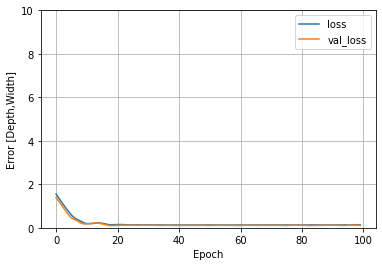

In [19]:
# построим график

plot_loss(history)

**Мы видим, что loss перестал падать после 12 эпохи**

In [20]:
# получим предсказания на тестовой части и посчитаем ошибку

test_results = {}

test_results['VW_model'] = VW_model.evaluate(
    test_features['VW'],
    test_labels, verbose = 0)

test_results

{'VW_model': 0.11333803087472916}

## Построим линейную модель с оригинальным нормалайзером, который использует все признаки

## linear_model

In [21]:
# создаем нашу нейронную сеть

linear_model = tf.keras.Sequential([
    normalizer, #первый слой с оригинальным нормалайзером
    layers.Dense(units=2) #полносвязный слой
])

In [22]:
# предсказываем значения

linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 94ms/step


array([[-0.013,  1.097],
       [-1.915, -0.637],
       [ 0.639, -1.803],
       [-0.04 , -3.2  ],
       [-1.915, -0.637],
       [-1.563,  0.088],
       [ 0.245,  1.807],
       [ 0.423, -0.123],
       [ 0.729, -2.813],
       [ 0.116,  1.452]], dtype=float32)

In [23]:
# компелируем модель

linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1), 
    loss = 'mean_absolute_error')
   

In [24]:
# обучаем модель

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 345ms/step - loss: 1.6418 - val_loss: 1.2380
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 1.4164 - val_loss: 1.0687
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 1.2023 - val_loss: 0.8819
Epoch 4/100
2/2 [==============================] - 0s 89ms/step - loss: 1.0245 - val_loss: 0.7194
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 0.8334 - val_loss: 0.5749
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6436 - val_loss: 0.4867
Epoch 7/100
2/2 [==============================] - 0s 52ms/step - loss: 0.5001 - val_loss: 0.3617
Epoch 8/100
2/2 [==============================] - 0s 55ms/step - loss: 0.3690 - val_loss: 0.2783
Epoch 9/100
2/2 [==============================] - 0s 38ms/step - loss: 0.3057 - val_loss: 0.2081
Epoch 10/100
2/2 [==============================] - 0s 86ms/step - loss: 0.2598 - val_loss: 0.1117
Epoch 11/100
2/2 [

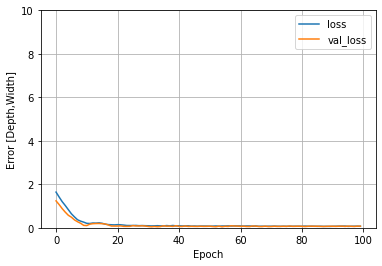

In [25]:
plot_loss(history)

**В данном случае loss перестал падать после 26 эпохи**

In [26]:
# получим предсказания на тестовой части и посчитаем ошибку

test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels, verbose = 0)

test_results

{'VW_model': 0.11333803087472916, 'linear_model': 0.09460560232400894}

## Построение многослойного персептрона

In [27]:
#напишем функцию многослойного персептрона, которую мы будем использовать для сбора каждой модели

def build_and_compile_model(norm):
    model = keras.Sequential([
        norm, #нормализация
        layers.Dense(64, activation='relu'), #полносвязный слой
        layers.Dense(64, activation='relu'), #полносвязный слой
        layers.Dense(1) 
])
    model.compile(loss='mean_absolute_error',
                  optimizer = tf.optimizers.Adam(learning_rate = 0.001)) #компелируем модель
    
    return model

## dnn_VW_model

In [28]:
#собираем модель и смотрим параметры

dnn_VW_model = build_and_compile_model(VW_normalizer)

dnn_VW_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [29]:
# обучаем модель

history = dnn_VW_model.fit(
    train_features['VW'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 225ms/step - loss: 1.5640 - val_loss: 1.4894
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 1.5038 - val_loss: 1.4441
Epoch 3/100
2/2 [==============================] - 0s 39ms/step - loss: 1.4444 - val_loss: 1.3986
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 1.3851 - val_loss: 1.3530
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 1.3257 - val_loss: 1.3071
Epoch 6/100
2/2 [==============================] - 0s 57ms/step - loss: 1.2652 - val_loss: 1.2593
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 1.2038 - val_loss: 1.2097
Epoch 8/100
2/2 [==============================] - 0s 23ms/step - loss: 1.1357 - val_loss: 1.1574
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 1.0697 - val_loss: 1.1026
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0048 - val_loss: 1.0462
Epoch 11/100
2/2 [

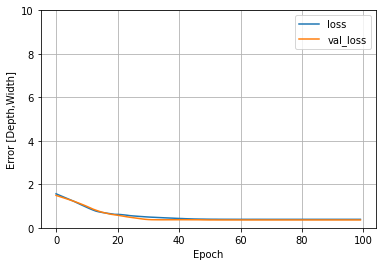

In [30]:
plot_loss(history)

**Loss перестает падать после 27 эпохи**

In [31]:
#сохраняем ошибку по данной модели в test_results

test_results['dnn_VW_model'] = dnn_VW_model.evaluate(test_features['VW'], test_labels, verbose=0)

## dnn_model

In [32]:
#собираем модель и смотрим параметры

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,554
Trainable params: 4,545
Non-trainable params: 9
_________________________________________________________________


In [33]:
# обучаем модель

history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 129ms/step - loss: 1.8741 - val_loss: 1.7433
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 1.7499 - val_loss: 1.6418
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 1.6363 - val_loss: 1.5474
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 1.5229 - val_loss: 1.4546
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 1.4148 - val_loss: 1.3698
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 1.3273 - val_loss: 1.2907
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 1.2432 - val_loss: 1.2113
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 1.1625 - val_loss: 1.1306
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0785 - val_loss: 1.0560
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 0.9981 - val_loss: 0.9784
Epoch 11/100
2/2 [

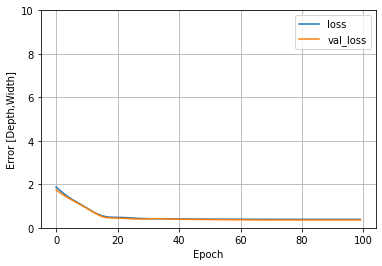

In [34]:
plot_loss(history)

**loss перестает падать после 27 эпохи**

In [35]:
#сохраняем ошибку в test_results

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## Сравним результаты моделей

In [36]:
#соберем таблицу с данными ошибки по каждой модели

pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T.sort_values(by='Mean absolute error [MPG]')

,Mean absolute error [MPG]
linear_model,0.094606
VW_model,0.113338
dnn_VW_model,0.404286
dnn_model,0.404286


**Мы видим, что лучшая модель linear_model, она показывает наименьшую ошибку**

## Сохраняем модель

In [37]:
# Используем метод save для сохранения модели
linear_model.save('linear_model')

In [38]:
# Используем keras.models.load_model  для загрузки модели
model_test = keras.models.load_model('linear_model')

In [39]:
#прогнозируем значения
model_test.predict(test_features)

1/1 [==============================] - 0s 39ms/step


array([[1.704, 2.494],
       [1.286, 2.031],
       [1.286, 2.031],
       [1.084, 1.799],
       [1.15 , 1.828],
       [1.704, 2.494],
       [1.704, 2.494],
       [1.06 , 2.33 ],
       [1.306, 1.859],
       [1.239, 1.743],
       [1.163, 1.801],
       [1.007, 1.727],
       [1.097, 1.772],
       [1.163, 1.801]], dtype=float32)